In [1]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6613/matrix/GSE6613_series_matrix.txt.gz

--2026-02-04 08:12:34--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE6nnn/GSE6613/matrix/GSE6613_series_matrix.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4417660 (4.2M) [application/x-gzip]
Saving to: ‘GSE6613_series_matrix.txt.gz’

GSE6613_series_matr 100%[===================>]   4.21M  1.86MB/s    in 2.3s    

2026-02-04 08:12:39 (1.86 MB/s) - ‘GSE6613_series_matrix.txt.gz’ saved [4417660/4417660]



In [24]:
import pandas as pd
import gzip


In [25]:
file_path = "/workspaces/Reasearch_Genomic/GSE6613_series_matrix.txt.gz"

with gzip.open(file_path, 'rt') as f:
    lines = f.readlines()


In [27]:
start = lines.index("!series_matrix_table_begin\n") + 1
end = lines.index("!series_matrix_table_end\n")

data_lines = lines[start:end]


In [28]:
from io import StringIO

data_str = "".join(data_lines)
df = pd.read_csv(StringIO(data_str), sep="\t")


In [29]:
df

,ID_REF,GSM153404,GSM153405,GSM153406,GSM153407,GSM153408,GSM153409,GSM153410,GSM153411,GSM153412,...,GSM153499,GSM153500,GSM153501,GSM153502,GSM153503,GSM153504,GSM153505,GSM153506,GSM153507,GSM153508
0,1007_s_at,114.5,105.1,145.7,168.7,94.3,96.2,155.8,99.8,100.9,...,153.8,103.7,132.8,195.5,82.6,28.2,163.9,29.0,104.8,32.8
1,1053_at,64.4,58.4,52.5,45.4,51.3,50.7,42.2,6.7,44.0,...,44.0,70.5,61.9,52.2,61.2,67.6,101.9,46.8,74.9,78.1
2,117_at,206.3,179.8,192.0,263.6,211.9,149.5,157.3,216.6,230.5,...,268.9,48.6,193.6,132.5,165.5,146.0,291.4,246.2,251.2,210.0
3,121_at,507.0,497.8,346.3,430.7,485.5,437.6,424.1,678.7,434.1,...,403.6,559.1,569.7,532.8,525.7,603.9,479.7,271.9,506.1,270.4
4,1255_g_at,34.5,18.0,40.1,40.5,22.8,6.4,27.4,5.2,34.7,...,44.8,39.5,30.5,65.8,54.3,19.3,61.0,40.8,29.5,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,2.0,2.6,4.3,4.2,3.3,4.7,2.6,7.1,3.6,...,14.1,7.1,7.5,4.8,6.1,2.9,6.9,4.8,32.2,4.7
22279,AFFX-ThrX-M_at,22.5,9.3,5.8,9.6,6.6,8.2,4.6,9.7,7.6,...,26.7,17.3,7.2,11.6,8.7,2.7,8.8,19.1,2.6,2.0
22280,AFFX-TrpnX-3_at,1.6,7.0,1.8,1.5,2.1,2.3,6.3,2.2,0.9,...,3.5,4.2,2.3,1.2,4.1,1.9,20.1,8.6,35.2,11.5
22281,AFFX-TrpnX-5_at,44.5,14.4,28.8,9.5,4.2,6.1,7.3,8.4,13.7,...,25.1,52.4,46.6,26.8,31.5,9.4,15.5,6.0,4.1,22.0


In [30]:
df = df.set_index(df.columns[0])
X = df.T


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, max_iter=5000, n_jobs=-1)
lasso.fit(X_scaled, y)


,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",5000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


In [32]:
import numpy as np

important_genes = X.columns[np.abs(lasso.coef_) > 0]
print("Selected genes:", important_genes)


Selected genes: Index(['200679_x_at', '201326_at', '201711_x_at', '201947_s_at', '202419_at',
       '203138_at', '203243_s_at', '205048_s_at', '206639_x_at', '207983_s_at',
       '208113_x_at', '208213_s_at', '208478_s_at', '209389_x_at',
       '209950_s_at', '211969_at', '212199_at', '212885_at', '213750_at',
       '214584_x_at', '215375_x_at', '215559_at', '216547_at', '217487_x_at',
       '217653_x_at', '217707_x_at', '218968_s_at', '219291_at', '220645_at',
       '220841_s_at', '221553_at', '221645_s_at'],
      dtype='str', name='ID_REF')


In [33]:
import numpy as np
import pandas as pd


In [34]:
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lasso.coef_
})

# Sort by absolute coefficient value
top32 = coef_df.reindex(
    coef_df.Coefficient.abs().sort_values(ascending=False).index
).head(32)

top32


,Gene,Coefficient
7493,207983_s_at,0.086462
2665,203138_at,0.044783
1238,201711_x_at,0.038323
13129,213750_at,-0.032605
14748,215375_x_at,-0.030016
15916,216547_at,-0.029136
17071,217707_x_at,-0.028014
12269,212885_at,0.023492
7717,208213_s_at,0.021286
853,201326_at,0.019736


In [35]:
top32_genes = top32["Gene"].tolist()
print(top32_genes)


['207983_s_at', '203138_at', '201711_x_at', '213750_at', '215375_x_at', '216547_at', '217707_x_at', '212885_at', '208213_s_at', '201326_at', '209950_s_at', '208113_x_at', '219291_at', '206639_x_at', '220645_at', '200679_x_at', '203243_s_at', '217653_x_at', '205048_s_at', '208478_s_at', '201947_s_at', '212199_at', '221553_at', '218968_s_at', '217487_x_at', '215559_at', '220841_s_at', '211969_at', '221645_s_at', '202419_at', '214584_x_at', '209389_x_at']


In [36]:
top32.to_csv("Top_32_Genes_Lasso.csv", index=False)


In [38]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 36.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 32.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


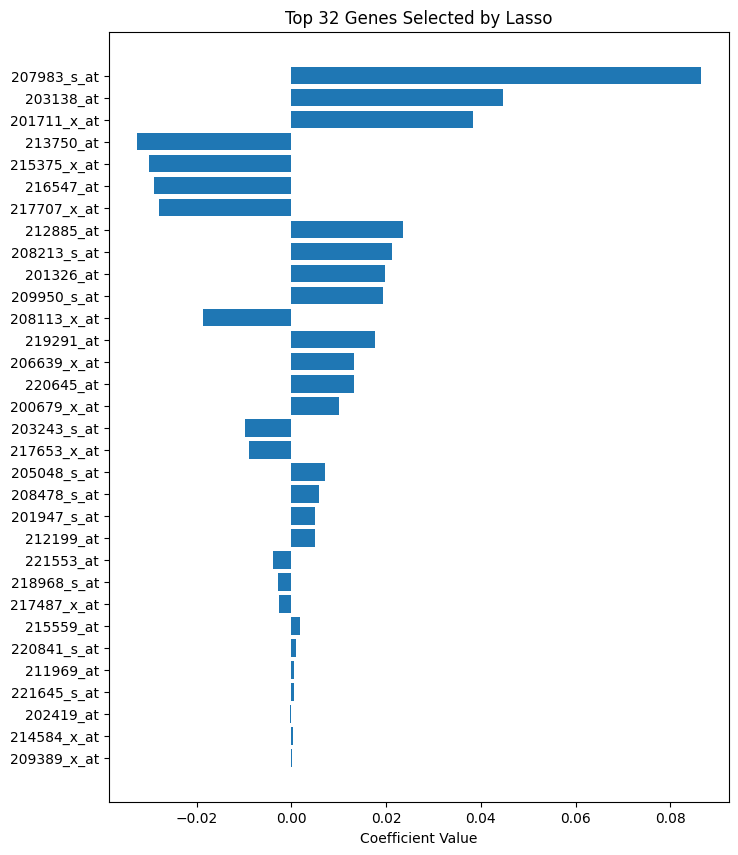

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.barh(top32["Gene"], top32["Coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 32 Genes Selected by Lasso")
plt.xlabel("Coefficient Value")
plt.show()


do the ann and accurancy for every thing
